In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
marketing_customer_data = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')

In [3]:
def data_types(dataframe):

    numerical = dataframe.select_dtypes(include = ['int64', 'float64'])
    categorical = dataframe.select_dtypes(include = ['object'])

    return numerical, categorical

numerical_data, categorical_data = data_types(marketing_customer_data)

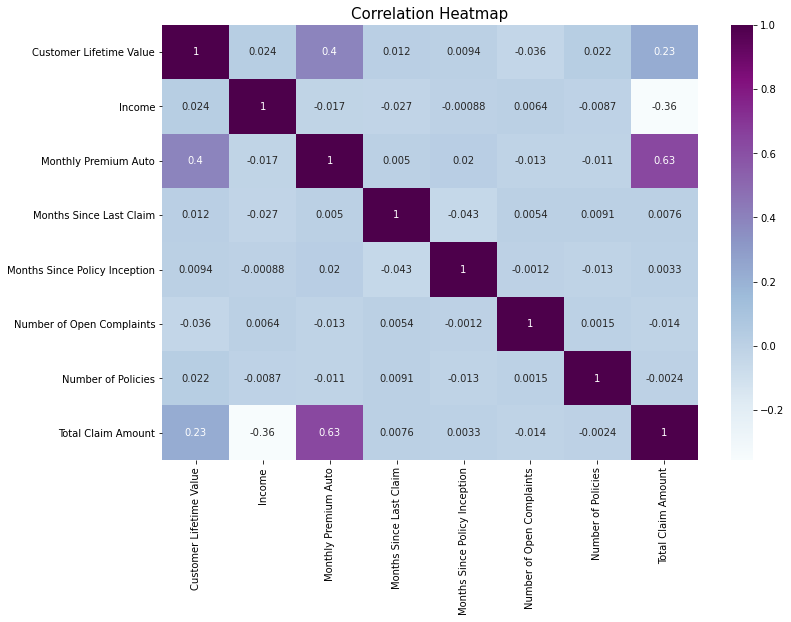

In [4]:
def correlation(dataframe):

    fig = plt.figure(figsize = (12,8))
    sns.heatmap(dataframe.corr(), annot = True, cmap = 'BuPu')
    plt.title('Correlation Heatmap', fontsize = 15)

    return plt.show()

correlation(numerical_data)

In [5]:
# We have 3 features that are highly correlated with the target: customer lifetime value, income and monthly premium auto.
# If we se the relation between that inputs, we can see that customer lifetime value is correlated with monthly premium auto.
# We are going to drop the one that is less correlated with the target, in this case, customer lifetime value.
# The none correlated features with the target are going to get drop too.

numerical_data = numerical_data[['Income', 'Monthly Premium Auto', 'Total Claim Amount']]
numerical_data

,Income,Monthly Premium Auto,Total Claim Amount
0,56274,69,384.811147
1,0,94,1131.464935
2,48767,108,566.472247
3,0,106,529.881344
4,43836,73,138.130879
...,...,...,...
9129,71941,73,198.234764
9130,21604,79,379.200000
9131,0,85,790.784983
9132,21941,96,691.200000
